**Alura Challenge - Data Science: Semana 1**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, matplotlib, scipy, pandas
Required-by: missingno


In [3]:
dados_clientes = pd.read_json(
    path_or_buf = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json',
    orient = 'columns'
    )

In [4]:
dados_clientes.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
len(dados_clientes)

7267

In [6]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [7]:
dados_clientes['customer'][201]

{'Dependents': 'No',
 'Partner': 'No',
 'SeniorCitizen': 0,
 'gender': 'Male',
 'tenure': 9}

In [8]:
dados_clientes['internet'][201]

{'DeviceProtection': 'No internet service',
 'InternetService': 'No',
 'OnlineBackup': 'No internet service',
 'OnlineSecurity': 'No internet service',
 'StreamingMovies': 'No internet service',
 'StreamingTV': 'No internet service',
 'TechSupport': 'No internet service'}

In [9]:
dados_teste = dados_clientes.drop('Churn', axis =1)

In [10]:
dados_teste.head()

,customerID,customer,phone,internet,account
0,0002-ORFBO,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
dados_customer= pd.json_normalize(data=dados_clientes.customer)

In [12]:
dados_customer.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [13]:
dados_phone= pd.json_normalize(data=dados_clientes.phone)
dados_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [14]:
dados_internet= pd.json_normalize(data=dados_clientes.internet)

In [15]:
dados_account= pd.json_normalize(data=dados_clientes.account)

In [16]:
dados_c_c = dados_clientes.drop('phone', axis = 1)

In [17]:
dados_c_c =dados_c_c.drop('customer', axis = 1)

In [18]:
dados_c_c =dados_c_c.drop('internet', axis = 1)

In [19]:
dados_c_c =dados_c_c.drop('account', axis = 1)

In [20]:
dados_api = pd.concat([dados_c_c, dados_customer, dados_phone, dados_internet, dados_account], axis=1)

In [21]:
dados_api

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [22]:
dados_api['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [23]:
dados_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [24]:
##dados_api.sort_values('Charges.Total', ascending=True, inplace=True)
##dados_api

Dados em branco não aparecem no isna() --- Nem pro Churn e nem pro Charges Total

In [25]:

dados_api['Churn'].isna().sum().sum()

0

In [26]:
dados_api['Charges.Total'].isnull().sum()

0

In [27]:
dados_api.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [28]:
duplicados = dados_api[dados_api.duplicated(keep='first')]

In [118]:
dados_api['gender'] = dados_api['gender'].astype('category')

In [30]:
dados_api['Churn']= dados_api['Churn'].replace([''], np.nan)

In [31]:
dados_api['Charges.Total']= dados_api['Charges.Total'].replace([' '], np.nan)

In [32]:
dados_api['Charges.Total'].isna().sum().sum()

11

In [33]:
dados_api['Churn'].isna().sum().sum()

224

Removendo linhas com Churn NaN

In [34]:
dados_new = dados_api.copy()

In [35]:
len(dados_new)

7267

In [36]:
dados_new['Churn'] = dados_new['Churn'].astype('category')

In [37]:
dados_new['Churn'].unique()

['No', 'Yes', NaN]
Categories (2, object): ['No', 'Yes']

In [38]:
dados_new.dropna(subset = ['Churn'], inplace=True)

In [39]:
dados_new['Churn'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [40]:
dados_new[dados_new['Charges.Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [41]:
dados_new.dropna(subset = ['Charges.Total'], inplace=True)

In [42]:
dados_new['Charges.Total'] = dados_new['Charges.Total'].astype('float')

In [43]:
dados_new.describe().round(2)

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30
std,0.37,24.55,30.09,2266.77
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,1397.48
75%,0.00,55.00,89.86,3794.74
max,1.00,72.00,118.75,8684.80


In [44]:
len(dados_new)

7032

# Refazendo o Índice após aplicar o dropna

In [45]:
dados_new.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266],
           dtype='int64', length=7032)

In [46]:
range(dados_new.shape[0])

range(0, 7032)

In [47]:
dados_new.index = range(dados_new.shape[0])

In [48]:
dados_new

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [49]:
dados_new['Id'] = dados_new.index +1

In [50]:
dados_new = dados_new.set_index('Id')

In [51]:
dados_new.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
Id,,,,,,,,,,,,,,,,,,,,,
1,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
2,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
3,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
4,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
5,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [52]:
dados_new['Trial'] = dados_new['Charges.Monthly']*dados_new['tenure']

In [53]:
dados_new['Trial2'] = dados_new['Charges.Total']- dados_new['Trial']

## Traduzindo as colunas:

In [54]:
dados_new = dados_new.rename(columns = {'customerID': 'ID_Cliente'})

In [55]:
dados_new.columns

Index(['ID_Cliente', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Trial', 'Trial2'],
      dtype='object')

In [56]:
traducao = {
    'gender': 'gênero', 
    'SeniorCitizen': 'idoso',
    'Partner': 'cônjugue',
    'Dependents': 'dependentes',
    'tenure': 'tempo_contrato',
    'PhoneService': 'serviço_telefônico',
    'MultipleLines': 'multilinhas',
    'InternetService': 'serviço_internet',
    'OnlineSecurity': 'segurança_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'segurança_dipositivo',
    'TechSupport': 'suporte_técnico',
    'StreamingTV': 'programa_TV',
    'StreamingMovies': 'programa_filmes',
    'Contract': 'contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'método_pagamento',
    'Charges.Monthly': 'fatura_mensal',
    'Charges.Total': 'fatura_total'
}

In [57]:
dados_new = dados_new.rename(columns = traducao)

In [58]:
dados_new['Churn'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [59]:
traducao_yn = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [60]:
dados_new.cônjugue = dados_new.cônjugue.map(traducao_yn)

In [61]:
dados_new.dependentes = dados_new.dependentes.map(traducao_yn)

In [62]:
dados_new.Churn = dados_new.Churn.map(traducao_yn)

In [63]:
dados_new.multilinhas = dados_new.multilinhas.map(traducao_yn)

In [64]:
#tentativa de traduzir com uma função
#def traducao(dataframe, colunas, traducao):
  #for item in itens:
   # dados_new[coluna].map(traducao)
  #return traducao

In [65]:
traducao2 = {
    'Female': 'Feminino',
    'Male': 'Masculino'
}

In [66]:
dados_new.gênero = dados_new.gênero.map(traducao2)

In [67]:
traducao_pag = {
    'Mailed check': 'aviso_email',
    'Electronic check': 'aviso_eletronico',
    'Credit card (automatic)': 'automatico_credito',
    'Bank transfer (automatic)': 'automatico_debito'
}

In [68]:
dados_new.método_pagamento = dados_new.método_pagamento.map(traducao_pag)

## Análise de outliers


In [69]:
dados_new[dados_new['tempo_contrato']== 1]

,ID_Cliente,Churn,gênero,idoso,cônjugue,dependentes,tempo_contrato,serviço_telefônico,multilinhas,serviço_internet,...,suporte_técnico,programa_TV,programa_filmes,contrato,fatura_digital,método_pagamento,fatura_mensal,fatura_total,Trial,Trial2
Id,,,,,,,,,,,,,,,,,,,,,
18,0021-IKXGC,Não,Feminino,1,Não,Não,1,Yes,Sim,Fiber optic,...,No,No,No,Month-to-month,Yes,aviso_eletronico,72.10,72.10,72.10,0.0
20,0023-HGHWL,Sim,Masculino,1,Não,Não,1,No,NaN,DSL,...,No,No,No,Month-to-month,Yes,aviso_eletronico,25.10,25.10,25.10,0.0
26,0032-PGELS,Sim,Feminino,0,Sim,Sim,1,No,NaN,DSL,...,No,No,No,Month-to-month,No,automatico_debito,30.50,30.50,30.50,0.0
49,0082-LDZUE,Não,Masculino,0,Não,Não,1,Yes,Não,DSL,...,No,No,No,Month-to-month,Yes,aviso_email,44.30,44.30,44.30,0.0
64,0107-WESLM,Sim,Masculino,0,Não,Não,1,Yes,Não,No,...,No internet service,No internet service,No internet service,Month-to-month,Yes,aviso_eletronico,19.85,19.85,19.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,9907-SWKKF,Sim,Feminino,1,Não,Não,1,No,NaN,DSL,...,No,No,No,Month-to-month,No,aviso_email,25.05,25.05,25.05,0.0
6997,9940-RHLFB,Sim,Feminino,0,Não,Não,1,Yes,Não,Fiber optic,...,No,No,No,Month-to-month,No,aviso_eletronico,75.30,75.30,75.30,0.0
7011,9962-BFPDU,Não,Feminino,0,Sim,Sim,1,Yes,Não,No,...,No internet service,No internet service,No internet service,Month-to-month,No,aviso_email,20.05,20.05,20.05,0.0


In [70]:
dados_new.describe().round(2)

,idoso,tempo_contrato,fatura_mensal,fatura_total,Trial,Trial2
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30,2283.15,0.15
std,0.37,24.55,30.09,2266.77,2264.70,67.26
min,0.00,1.00,18.25,18.80,18.80,-370.85
25%,0.00,9.00,35.59,401.45,397.80,-28.65
50%,0.00,29.00,70.35,1397.48,1394.57,0.00
75%,0.00,55.00,89.86,3794.74,3791.25,28.70
max,1.00,72.00,118.75,8684.80,8550.00,373.25


In [71]:
#através do describe não foram encontrados outliers;

## Criando coluna de contrato diário

In [72]:
dados_new['tempo_dias'] = (dados_new['tempo_contrato']*30).round(2)

In [73]:
dados_new.head(5)

,ID_Cliente,Churn,gênero,idoso,cônjugue,dependentes,tempo_contrato,serviço_telefônico,multilinhas,serviço_internet,...,programa_TV,programa_filmes,contrato,fatura_digital,método_pagamento,fatura_mensal,fatura_total,Trial,Trial2,tempo_dias
Id,,,,,,,,,,,,,,,,,,,,,
1,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Yes,Não,DSL,...,Yes,No,One year,Yes,aviso_email,65.6,593.30,590.4,2.90,270
2,0003-MKNFE,Não,Masculino,0,Não,Não,9,Yes,Sim,DSL,...,No,Yes,Month-to-month,No,aviso_email,59.9,542.40,539.1,3.30,270
3,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Yes,Não,Fiber optic,...,No,No,Month-to-month,Yes,aviso_eletronico,73.9,280.85,295.6,-14.75,120
4,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Yes,Não,Fiber optic,...,Yes,Yes,Month-to-month,Yes,aviso_eletronico,98.0,1237.85,1274.0,-36.15,390
5,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Yes,Não,Fiber optic,...,Yes,No,Month-to-month,Yes,aviso_email,83.9,267.40,251.7,15.70,90


In [74]:
dados_churns = dados_new[dados_new['Churn']== 'Sim']

In [75]:
dados_churnn = dados_new[dados_new['Churn']== 'Não']

In [76]:
dados_churns.describe().round(2)

,idoso,tempo_contrato,fatura_mensal,fatura_total,Trial,Trial2,tempo_dias
count,1869.00,1869.00,1869.00,1869.00,1869.00,1869.00,1869.00
mean,0.25,17.98,74.44,1531.80,1531.61,0.19,539.37
std,0.44,19.53,24.67,1890.82,1886.77,55.81,585.93
min,0.00,1.00,18.85,18.85,18.85,-355.35,30.00
25%,0.00,2.00,56.15,134.50,137.90,-17.15,60.00
50%,0.00,10.00,79.65,703.55,700.00,0.00,300.00
75%,1.00,29.00,94.20,2331.30,2334.80,16.00,870.00
max,1.00,72.00,118.35,8684.80,8481.60,274.35,2160.00


In [77]:
dados_churnn.describe().round(2)

,idoso,tempo_contrato,fatura_mensal,fatura_total,Trial,Trial2,tempo_dias
count,5163.00,5163.00,5163.00,5163.00,5163.00,5163.00,5163.00
mean,0.13,37.65,61.31,2555.34,2555.20,0.14,1129.50
std,0.34,24.08,31.09,2329.46,2327.90,70.95,722.31
min,0.00,1.00,18.25,18.80,18.80,-370.85,30.00
25%,0.00,15.00,25.10,577.83,580.40,-32.88,450.00
50%,0.00,38.00,64.45,1683.60,1691.75,0.00,1140.00
75%,0.00,61.00,88.48,4264.12,4252.80,33.68,1830.00
max,1.00,72.00,118.75,8672.45,8550.00,373.25,2160.00


## Análise descritiva primária

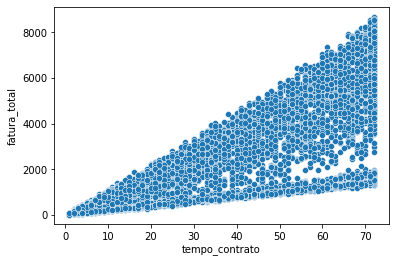

In [78]:
churns_dist = sns.scatterplot(x= 'tempo_contrato', y= 'fatura_total', data= dados_new)

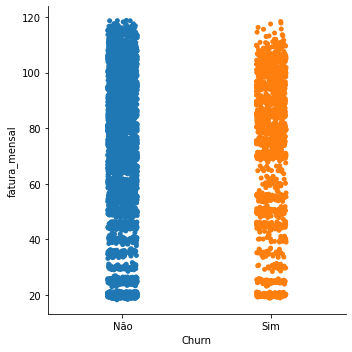

In [79]:
sns.catplot(x = 'Churn', y = 'fatura_mensal', data= dados_new)

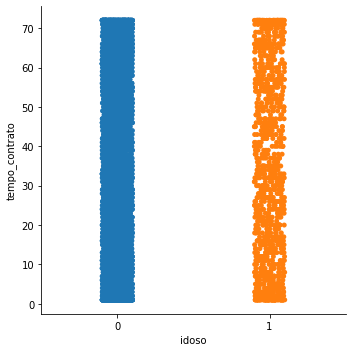

In [80]:
sns.catplot(x = 'idoso', y = 'tempo_contrato', data= dados_new)

In [81]:
len(dados_churns)

1869

In [82]:
len(dados_churnn)

5163

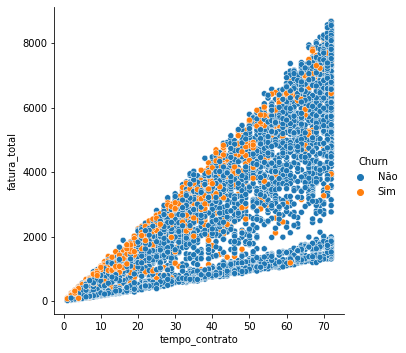

In [83]:
sns.relplot(x='tempo_contrato', y= 'fatura_total', hue ='Churn', data=dados_new)

In [84]:
dados_new['método_pagamento'].unique()

array(['aviso_email', 'aviso_eletronico', 'automatico_credito',
       'automatico_debito'], dtype=object)

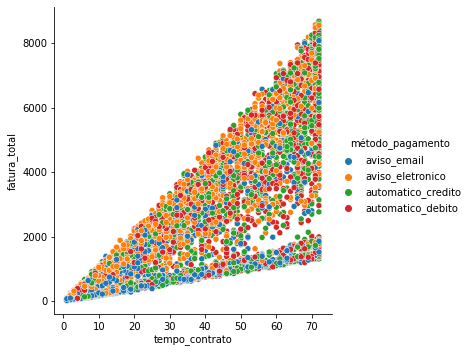

In [85]:
sns.relplot(x='tempo_contrato', y= 'fatura_total', hue ='método_pagamento', data=dados_new)

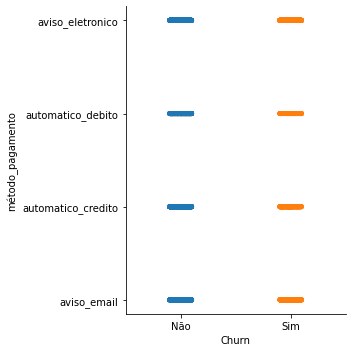

In [86]:
sns.catplot(x = 'Churn', y = 'método_pagamento', data= dados_new)

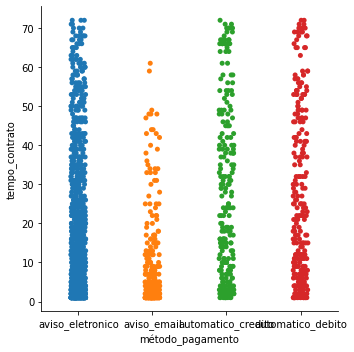

In [87]:
g = sns.catplot(x = 'método_pagamento', y = 'tempo_contrato', data= dados_churns)


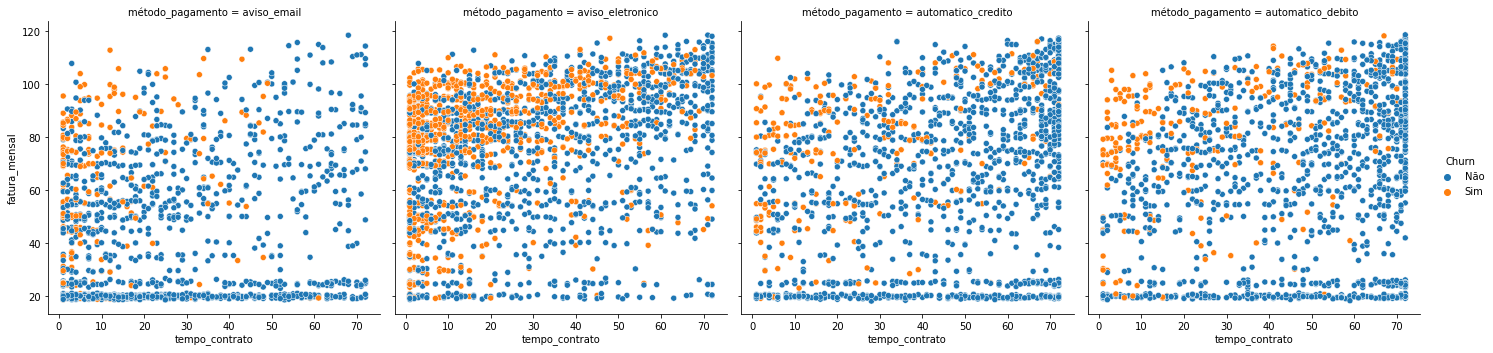

In [88]:
sns.relplot(x='tempo_contrato', y = 'fatura_mensal', hue='Churn', col ='método_pagamento', data = dados_new)

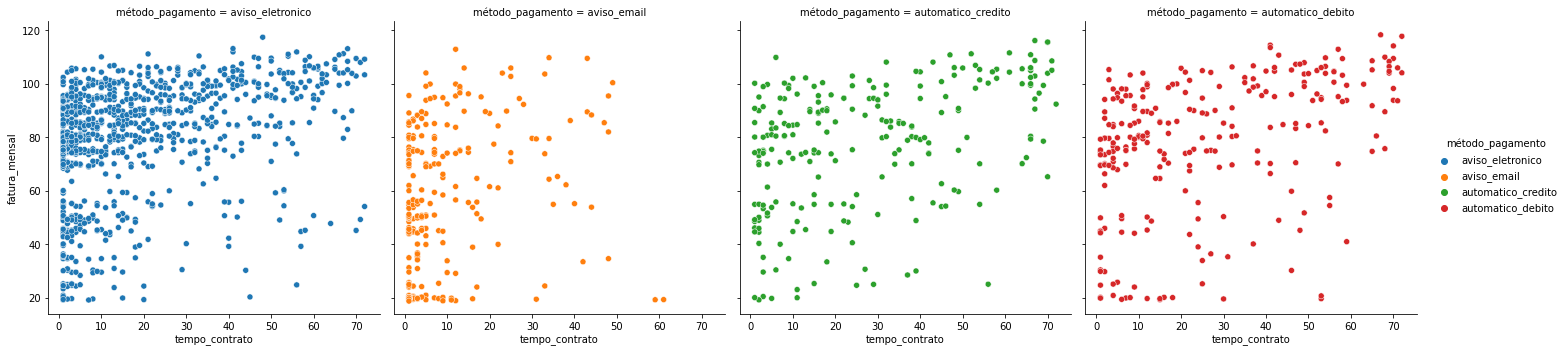

In [89]:
sns.relplot(x='tempo_contrato', y = 'fatura_mensal', hue='método_pagamento', col ='método_pagamento', data = dados_churns)

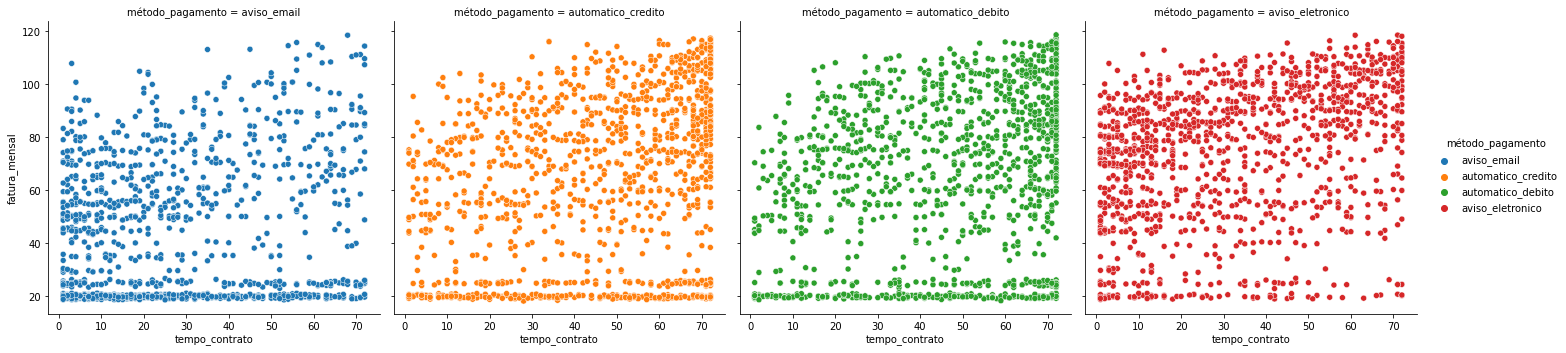

In [90]:
sns.relplot(x='tempo_contrato', y = 'fatura_mensal', hue='método_pagamento', col ='método_pagamento', data = dados_churnn)

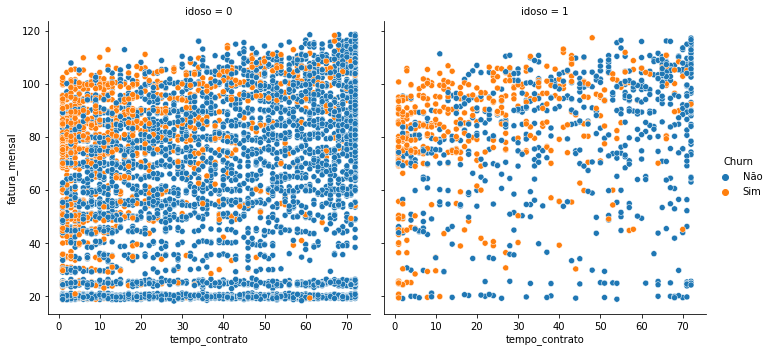

In [91]:
sns.relplot(x='tempo_contrato', y = 'fatura_mensal', hue='Churn', col ='idoso', data = dados_new)

#### necessário normalizar para entender melhor

In [92]:
conferencia_metodopag_churns = dados_churns['método_pagamento'].value_counts()

In [93]:
conferencia_metodopag_churnn = dados_churnn['método_pagamento'].value_counts()
conferencia_metodopag_churnn

aviso_email           1296
aviso_eletronico      1294
automatico_credito    1289
automatico_debito     1284
Name: método_pagamento, dtype: int64

In [94]:
conferencia_metodopag_churnn = pd.DataFrame(conferencia_metodopag_churnn)

In [95]:
conferencia_metodopag_churnn['percentual'] = (conferencia_metodopag_churnn['método_pagamento']/len(dados_churnn)*100).round(2)

In [96]:
conferencia_metodopag_churnn

,método_pagamento,percentual
aviso_email,1296,25.10
aviso_eletronico,1294,25.06
automatico_credito,1289,24.97
automatico_debito,1284,24.87


In [97]:
conferencia_metodopag_churns = pd.DataFrame(conferencia_metodopag_churns)

In [98]:
conferencia_metodopag_churns['percentual'] = (conferencia_metodopag_churns['método_pagamento']/len(dados_churns)*100)

In [99]:
conferencia_metodopag_churns

,método_pagamento,percentual
aviso_eletronico,1071,57.303371
aviso_email,308,16.479401
automatico_debito,258,13.804173
automatico_credito,232,12.413055


In [100]:
conferencia_metodopag_churns['percentual'].sum()

100.0

In [101]:
conferencia_metodopag_churnn['percentual'].sum()

100.0

In [102]:
conferencia_metodopag_churns['método_pagamento'].sum()

1869

In [103]:
len(dados_churns)

1869

## Alguns testes com o banco de dados

In [104]:
for item in dados_new:
  print(item)

ID_Cliente
Churn
gênero
idoso
cônjugue
dependentes
tempo_contrato
serviço_telefônico
multilinhas
serviço_internet
segurança_online
backup_online
segurança_dipositivo
suporte_técnico
programa_TV
programa_filmes
contrato
fatura_digital
método_pagamento
fatura_mensal
fatura_total
Trial
Trial2
tempo_dias


In [105]:
tes = dados_new.iterrows()

In [106]:
for index, row in dados_new.iterrows():
  if (row['Churn'] == 'Sim'):
    dados_new.loc[index, 'inventando'] = row['fatura_total']/row['fatura_mensal']
  else:
    dados_new.loc[index, 'inventando'] = 0 

In [107]:
dados_new.head(3)

,ID_Cliente,Churn,gênero,idoso,cônjugue,dependentes,tempo_contrato,serviço_telefônico,multilinhas,serviço_internet,...,programa_filmes,contrato,fatura_digital,método_pagamento,fatura_mensal,fatura_total,Trial,Trial2,tempo_dias,inventando
Id,,,,,,,,,,,,,,,,,,,,,
1,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Yes,Não,DSL,...,No,One year,Yes,aviso_email,65.6,593.30,590.4,2.90,270,0.000000
2,0003-MKNFE,Não,Masculino,0,Não,Não,9,Yes,Sim,DSL,...,Yes,Month-to-month,No,aviso_email,59.9,542.40,539.1,3.30,270,0.000000
3,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Yes,Não,Fiber optic,...,No,Month-to-month,Yes,aviso_eletronico,73.9,280.85,295.6,-14.75,120,3.800406


In [108]:
dados_new.query("idoso == 1")

,ID_Cliente,Churn,gênero,idoso,cônjugue,dependentes,tempo_contrato,serviço_telefônico,multilinhas,serviço_internet,...,programa_filmes,contrato,fatura_digital,método_pagamento,fatura_mensal,fatura_total,Trial,Trial2,tempo_dias,inventando
Id,,,,,,,,,,,,,,,,,,,,,
4,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Yes,Não,Fiber optic,...,Yes,Month-to-month,Yes,aviso_eletronico,98.00,1237.85,1274.00,-36.15,390,12.631122
5,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Yes,Não,Fiber optic,...,No,Month-to-month,Yes,aviso_email,83.90,267.40,251.70,15.70,90,3.187128
7,0013-SMEOE,Não,Feminino,1,Sim,Não,71,Yes,Não,Fiber optic,...,Yes,Two year,Yes,automatico_debito,109.70,7904.25,7788.70,115.55,2130,0.000000
9,0015-UOCOJ,Não,Feminino,1,Não,Não,7,Yes,Não,DSL,...,No,Month-to-month,Yes,aviso_eletronico,48.20,340.35,337.40,2.95,210,0.000000
18,0021-IKXGC,Não,Feminino,1,Não,Não,1,Yes,Sim,Fiber optic,...,No,Month-to-month,Yes,aviso_eletronico,72.10,72.10,72.10,0.00,30,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,9961-JBNMK,Sim,Masculino,1,Não,Não,21,Yes,Não,Fiber optic,...,Yes,Month-to-month,Yes,automatico_debito,96.80,2030.30,2032.80,-2.50,630,20.974174
7013,9965-YOKZB,Sim,Masculino,1,Não,Não,9,Yes,Sim,Fiber optic,...,Yes,Month-to-month,Yes,aviso_eletronico,83.85,790.15,754.65,35.50,270,9.423375
7017,9971-ZWPBF,Não,Masculino,1,Sim,Sim,34,Yes,Sim,Fiber optic,...,Yes,Month-to-month,Yes,aviso_eletronico,108.90,3625.20,3702.60,-77.40,1020,0.000000


### Verificando a correlação dos dados

H0: A distribuição do Churn é a mesma, independente do método de pagamento

H1: A distribuição do Churn não é a mesma, a depender do método de pagamento



In [121]:
from scipy.stats import ranksums

In [122]:
met_pag_s = dados_new.query("Churn == 'Sim'").método_pagamento

In [123]:
met_pag_n = dados_new.query("Churn == 'Não'").método_pagamento

In [124]:
r = ranksums(met_pag_s, met_pag_n)

In [128]:
print('O valor do p-value foi de: {}'.format(r.pvalue))

O valor do p-value foi de: 1.3122963350716884e-18
